In [1]:
from PIL import Image
import glob,StringIO
import base64

In [2]:
def generate_montage(filenames, output_fn):
    row_size=1
    hMargin=3
    hPositions=[]
    images = [Image.open(filename) for filename in filenames]

    width = max(image.size[0] for image in images)
    height = sum(image.size[1] + margin for image in images)
    print width, height
    montage = Image.new(mode='RGBA', size=(width, height), color=(0,0,0,0))

    max_x = 0
    max_y = 0
    offset_x = 0
    offset_y = 0
    for i,image in enumerate(images):
        montage.paste(image, (offset_x, offset_y))
        max_x = max(max_x, offset_x + image.size[0])
        max_y = max(max_y, offset_y + image.size[1])
        
        hPositions.append(offset_y+image.size[1]+hMargin)

        if i % row_size == row_size-1:
            offset_y = max_y + margin
            offset_x = 0
        else:
            offset_x += margin + image.size[0]

#    montage = montage.crop((0, 0, max_x, max_y))
    return (montage,hPositions)

In [3]:
repertoire="/Users/gilles/ownCloud/Cours/Bordeaux/L1-LinguistiqueGenerale/Kalaba-Project/16-K1/Images/"
nomImages=glob.glob(repertoire+"16-K1-ECRIT*.png")
nomImages=sorted(nomImages,key=lambda x: len(x))

In [4]:
margin = 50
imageIO=StringIO.StringIO()

for num,filenames in enumerate(zip(*(iter(nomImages),) * 5)):
    (montage,hPositions)=generate_montage(filenames, repertoire+"DD%d.png"%num)
    pieces=[{"drag":"text %d"%h,"drop":(0,h)} for h in hPositions]
    montage.save(imageIO,"PNG")
    base64Image=base64.b64encode(imageIO.getvalue())

505 336
486 336
458 335
543 335
524 335
424 335
424 336
425 336
509 335
491 336
541 350
434 336
541 351
541 350
405 335
505 338
426 337
440 337
440 336
477 335
543 335
541 351
343 335
543 335
541 349
495 335
486 335
541 349
541 349
507 336


[20, 88, 155, 222, 289]


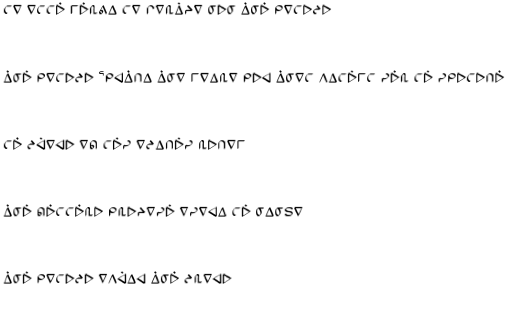

In [5]:
print hPositions
montage

In [6]:
categorie=u"Morphologie/Kalaba16/K1/Écriture"
from ToolsMoodleXML import *
import ToolsMoodleXML

In [7]:
test=DragDropImage("test",
                      u"Associez écriture et prononciation.",
                      base64Image,
                      pieces
                     )
print test.forme

<question type="ddimageortext">
<name><text>test</text></name>
<questiontext><text><![CDATA[Associez écriture et prononciation.]]></text></questiontext>
<generalfeedback><text>Bien reçu.</text></generalfeedback>
<shuffleanswers>1</shuffleanswers>
<penalty>0.3333333</penalty>
<file name="test" encoding="base64">iVBORw0KGgoAAAANSUhEUgAAAfkAAAFQCAYAAAC8pQfCAACjR0lEQVR4nOzdd1hUR98//veylAWW3gQpUpRqQSMCiooidglGY+yKPbFGTazRaG67JkFRQVERC2IXNGCLUVEQERWUIgrSpHfYvvP7wy/nYd1dQON953nu37yui+uKp8yZM+czM+fMmbNhEUIIKIqiKIr6r6PyT2eAoiiKoqh/D6WdfHV1Nfbv34+ysrK/fZDGxkacPXsWhYWFoAMHn09BQQF+/vlnNDU1/dNZ+Y/Ky8vDtm3bwOPxPnvaEokEycnJiI+Ph1gs/uzp/19SVFSELVu2oLGx8W+nVVZWhp07d6K+vv4z5OzT/De2Q1lZWfj1118hEAj+dlq5ubn/tnr1qQghePr0KcLDwyESif7p7LSKx+Phzp07ePHiBaRS6T+dnf9BlLh27RoxNjYm/v7+yjZptydPnpDOnTsTX19fUlJS8rfTo977+eefCZvNJhs2bPins/IftXz5cqKhoUF27dr12dOurq4mAwYMII6OjiQxMfGzp/9/yY4dO4iGhgb54Ycf/nZax48fJ9ra2mTatGmfIWefJiUlhWmHSktL/7F8fE4TJkwgXC6XnD59+m+ntXjxYqKhoUF+++23z5Czz0MkEpHBgwcTExMTcuPGjX86O616+fIl8fDwIJ6eniQv